In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
import math
import statsmodels.api as sm
import random
import scipy.io as sio
import h5py 
import datetime
import pylab
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
%matplotlib inline 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#part A

#close form solution
def get_close_form(data):
    ''' theta=(XtX)^-1XtY
    '''
    x=data[:,0:-1]
    y=data[:,-1]
    sol=inv(x.transpose().dot(x)).dot(x.transpose()).dot(y)
    return sol

# (b) stochatic mini-batch Gradient Descent
def get_sgd_form(data,m,max_iter,learning_rate,tolerance):
    '''use stochastic gradiant descent, batch size m, set max_iteration, learning rate and tolerance respectively
    '''
    #for data size n*p
    x=data[:,0:-1]
    y=data[:,-1]
    (a,b)=data.shape
    #set initial theta to be 0 vector
    init_sol=np.full(b-1,0)
    sol=[init_sol]
    k=0
    dist=[0]
    error=tolerance
    while True:
        ro=learning_rate/(0.0001*k+1)
        sample_index=random.sample(range(a),m)
        x_sub=x[sample_index,:]
        y_sub=y[sample_index]
        #dj/dtheta=2xt(xtheta-y) iter step
        sol.append(sol[k]-2*ro*((x_sub.transpose()).dot(x_sub.dot(sol[k])-y_sub))/m)
        k+=1
        dist.append(np.linalg.norm((sol[k]-sol[k-1])))
        #check convergence
        if  np.linalg.norm(2*((x_sub.transpose()).dot(x_sub.dot(sol[k])-y_sub))/m) <error or k> max_iter:



            print("iterations taken is:",k,"last step move is", dist[k])
            pylab.plot(range(len(sol)), dist)
            pylab.show()
            return sol[k]
        #else:
           # print(k,dist[k])
 
 
def evaluate_error(theta,test_data):
    '''elavuate mean squared error by theta, testx and testy
    imput is parameter and df[x,y]
    '''
    (a,b)=test_data.shape
    x=test_data[:, 0:-1]
    y=test_data[:,-1]
    error_list=[]
    for i in range(a):
        predict=theta.dot(x[i,:])
        error=pow((predict-y[i]),2)
        error_list.append(error)
    mse=np.sum(error)/a
    return mse            
        



In [3]:
#Part B
#read data

mat_1 = sio.loadmat('dataset1.mat', squeeze_me=True)

In [4]:
X_trn=mat_1["X_trn"]
X_tst=mat_1["X_tst"]
Y_trn=mat_1["Y_trn"]
Y_tst=mat_1["Y_tst"]

In [5]:
# N=[2,3,5]
#for n=2
#create dataset=X,Y where X is 120*(n+1); Y is 120*1
def form_data(x,y,n):
    '''
    create input data matrix which has column: x^0,x^1,...x^n,y
    '''
    a=len(y)
    data=np.full(a,1)
    for i in range(n):
        arr=pow(x,i+1)
        data=np.column_stack((data,arr))
    data=np.column_stack((data,y))
    return data

In [6]:
# transfer x to phi(x) ;output data is in the form[x^0,x^1,...x^n,y]
train_2=form_data(X_trn,Y_trn,2)
train_3=form_data(X_trn,Y_trn,3)
train_5=form_data(X_trn,Y_trn,5)
test_2=form_data(X_tst,Y_tst,2)
test_3=form_data(X_tst,Y_tst,3)
test_5=form_data(X_tst,Y_tst,5)

In [7]:
## normalize train data so it's easier to converge( avoid overflow say, for xi^5 when xi is small)
# use same normalizing scale to normalize test data, this ensure our mse is evaluated correctly
def normalize_data(train,test):
    train_scaled = preprocessing.minmax_scale(train,(1,2))
    scaler = preprocessing.MinMaxScaler(feature_range=(1, 2), copy=True).fit(train)
    test_scaled=scaler.transform(test) 
    
    return (train_scaled,test_scaled)

In [8]:
#scale the data for n=2,3,5
(train_2_scaled,test_2_scaled)=normalize_data(train_2,test_2)
(train_3_scaled,test_3_scaled)=normalize_data(train_3,test_3)
(train_5_scaled,test_5_scaled)=normalize_data(train_5,test_5)

#### Now lets evaluate close form solution and sgd form solution;
#### we plot step-wise increment vs iteration to see if the sgd result converges

##### (Notice by changing convergence_tolerance and learning rate we could get sgd_form solution approacing close_form solution)

iterations taken is: 100001 last step move is 3.205907215e-05


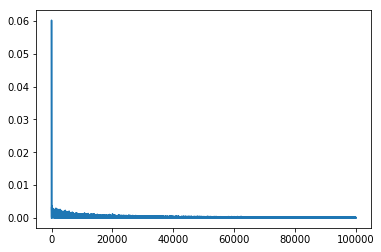

close_form_solutin is: [-0.18923747  0.6147389   0.38819467]
sgd_form_solutin is: [-0.18955464  0.61544931  0.38853524]


In [20]:
sample_size=20
(close_2,sgd_2)=(get_close_form(train_2_scaled),get_sgd_form(train_2_scaled,sample_size,max_iter=100000,learning_rate=0.01,
                                                            tolerance=0.0001))
print("close_form_solutin is:", close_2)
print("sgd_form_solutin is:",sgd_2)

iterations taken is: 100001 last step move is 0.000454264622142


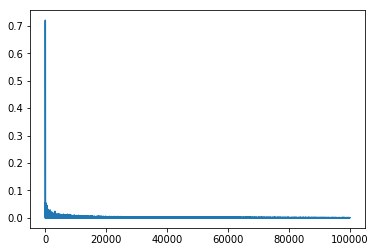

close_form_solutin is: [-0.7027276   0.02619476  0.37424813  0.94423958]
sgd_form_solutin is: [-0.70105211  0.02671003  0.37445209  0.94378368]


In [21]:
sample_size=20
(close_3,sgd_3)=(get_close_form(train_3_scaled),get_sgd_form(train_3_scaled,sample_size,100000,learning_rate=0.1,
                                                            tolerance=0.0001))
print("close_form_solutin is:",close_3)
print("sgd_form_solutin is:",sgd_3)

iterations taken is: 55692 last step move is 1.21255537477e-06


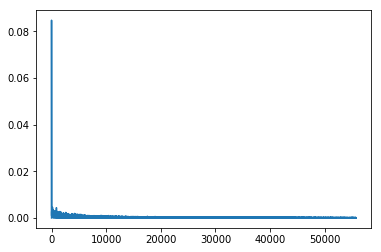

close_form_solutin is: [-0.6993178   0.02612493  0.40002064  0.94818039 -0.02935886 -0.0054981 ]
sgd_form_solutin is: [-0.68563837  0.17311303  0.36267307  0.4625734   0.0099618   0.32471085]


In [41]:
sample_size=30
(close_5,sgd_5)=(get_close_form(train_5_scaled),get_sgd_form(train_5_scaled,sample_size,100000,learning_rate=0.01,
                                                            tolerance=0.001))
print("close_form_solutin is:",close_5)
print("sgd_form_solutin is:",sgd_5)

#### Next we evaluate MSE on traing and test data using both sgd and close form theta.

#### Nothice both training and test data are sclaed between 1,2; for same n, the sale method is same so this wouldn't affect model selection by comparing mse.

#### From the result we see close_form and sgd_form generate similar mse as we control the tolerance level low (0.0001 in this case); this is reasonable as we basically get sgd_form very near the close_form solution;

#### Another finding is that generally test mse is greater than training mse: this is also reasonable because we didn't do any cross validation, and the model will more or less overfit the training data.

In [42]:
# for n=2,3,5 compute mse on train data:
#n=2
train_mse2_close=evaluate_error(close_2,train_2_scaled)
train_mse2_sgd=evaluate_error(sgd_2,train_2_scaled)
#n=3
train_mse3_close=evaluate_error(close_3,train_3_scaled)
train_mse3_sgd=evaluate_error(sgd_3,train_3_scaled)
#n=5
train_mse5_close=evaluate_error(close_5,train_5_scaled)
train_mse5_sgd=evaluate_error(sgd_5,train_5_scaled)

In [43]:
# for n=2,3,5 compute mse on test data:
#n=2
test_mse2_close=evaluate_error(close_2,test_2_scaled)
test_mse2_sgd=evaluate_error(sgd_2,test_2_scaled)
#n=3
test_mse3_close=evaluate_error(close_3,test_3_scaled)
test_mse3_sgd=evaluate_error(sgd_3,test_3_scaled)
#n=5
test_mse5_close=evaluate_error(close_5,test_5_scaled)
test_mse5_sgd=evaluate_error(sgd_5,test_5_scaled)

In [44]:
#print out mse on training data using both close form and sgd form solution
# notice these are on normalized data for easy comparison
print("for n=2, mse on training using close form solution is;",train_mse2_close)
print("for n=2, mse on training using sgd form solution is;",train_mse2_sgd)
print("for n=3, mse on training using close form solution is;",train_mse3_close)
print("for n=3, mse on training using sgd form solution is;",train_mse3_sgd)
print("for n=5, mse on training using close form solution is;",train_mse5_close)
print("for n=5, mse on training using sgd form solution is;",train_mse5_sgd)

for n=2, mse on training using close form solution is; 5.3823938274e-05
for n=2, mse on training using sgd form solution is; 5.2432826423e-05
for n=3, mse on training using close form solution is; 8.11989548952e-06
for n=3, mse on training using sgd form solution is; 7.14426958741e-06
for n=5, mse on training using close form solution is; 9.26283077098e-06
for n=5, mse on training using sgd form solution is; 1.37237641288e-05


In [46]:
#print out mse on training data using both close form and sgd form solution 
# notice these are on normalized data for easy comparison
print("for n=2, mse on test data using close form solution is;",test_mse2_close)
print("for n=2, mse on test data using sgd form solution is;",test_mse2_sgd)
print("for n=3, mse on test data using close form solution is;",test_mse3_close)
print("for n=3, mse on test data using sgd form solution is;",test_mse3_sgd)
print("for n=5, mse on test data using close form solution is;",test_mse5_close)
print("for n=5, mse on test data using sgd form solution is;",test_mse5_sgd)

for n=2, mse on test data using close form solution is; 8.04821555399e-05
for n=2, mse on test data using sgd form solution is; 8.31558989485e-05
for n=3, mse on test data using close form solution is; 1.2928710716e-05
for n=3, mse on test data using sgd form solution is; 1.45304565709e-05
for n=5, mse on test data using close form solution is; 1.53428015806e-05
for n=5, mse on test data using sgd form solution is; 1.05245656653e-05


---------------------------------------


#### Then we evaluate batch size's effect on running time and error;

#### For simplicity we now set convergece_rate to a higher value so that we can easily visualize the effect

In [47]:
##redefine the function so that convergence plot is not shown;
def get_sgd_form(data,m,max_iter,learning_rate,tolerance):
    '''use stochastic gradiant descent, batch size m, set max_iteration, learning rate and tolerance respectively
    '''
    #for data size n*p
    x=data[:,0:-1]
    y=data[:,-1]
    (a,b)=data.shape
    #set initial theta to be 0 vector
    init_sol=np.full(b-1,0)
    sol=[init_sol]
    k=0
    dist=[0]
    error=tolerance
    while True:
        ro=learning_rate/(0.0001*k+1)
        sample_index=random.sample(range(a),m)
        x_sub=x[sample_index,:]
        y_sub=y[sample_index]
        #dj/dtheta=2xt(xtheta-y) iter step
        sol.append(sol[k]-2*ro*((x_sub.transpose()).dot(x_sub.dot(sol[k])-y_sub))/m)
        k+=1
        dist.append(np.linalg.norm((sol[k]-sol[k-1])))
        #check convergence
        if  np.linalg.norm(2*((x_sub.transpose()).dot(x_sub.dot(sol[k])-y_sub))/m) <error or k> max_iter:



            print("iterations taken is:",k,"last step move is", dist[k])
            ##pylab.plot(range(len(sol)), dist)
            ##pylab.show()
            return sol[k]

In [48]:
##we plot time and error vs batch size; here batch size is a list [1,2,3,...120]
sample_size=list(range(1,120))
time_l=[]
error_l=[]
for x in sample_size:
    start=datetime.datetime.now()
    sgd=(get_sgd_form(train_2_scaled,x,50000,learning_rate=0.1,tolerance=0.008))
    test_error=evaluate_error(sgd,test_2_scaled)
    end=datetime.datetime.now()
    time=(end-start).total_seconds()
    time_l.append(time)
    error_l.append(test_error)


iterations taken is: 11 last step move is 0.00198926293105
iterations taken is: 32 last step move is 0.00390578058866
iterations taken is: 10 last step move is 0.00193689820827
iterations taken is: 10 last step move is 7.14999487284e-05
iterations taken is: 12 last step move is 0.00776367361901
iterations taken is: 6 last step move is 0.00520584908572
iterations taken is: 43 last step move is 0.00437698679859
iterations taken is: 7 last step move is 0.0051039504567
iterations taken is: 53 last step move is 0.00185416693738
iterations taken is: 24 last step move is 0.00434909451538
iterations taken is: 19 last step move is 0.00560568236978
iterations taken is: 31 last step move is 0.0118526989917
iterations taken is: 51 last step move is 0.0118419922856
iterations taken is: 8 last step move is 0.0118468058451
iterations taken is: 31 last step move is 0.0170057337411
iterations taken is: 17 last step move is 0.0086380535661
iterations taken is: 9 last step move is 0.00193449115486
iterat

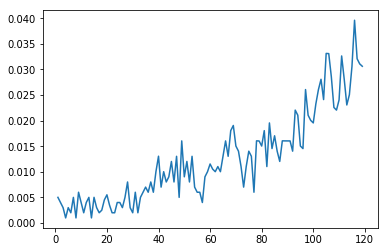

In [49]:
pylab.plot(sample_size, time_l)
pylab.show()

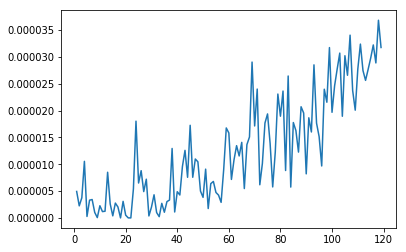

In [50]:
pylab.plot(sample_size, error_l)
pylab.show()

In [60]:

# lets try one more case, when n=5
sample_size=list(range(1,120))
time_l=[]
error_l=[]
for x in sample_size:
    start=datetime.datetime.now()
    sgd=(get_sgd_form(train_3_scaled,x,50000,learning_rate=0.1,tolerance=0.01))
    test_error=evaluate_error(sgd,test_3_scaled)
    end=datetime.datetime.now()
    time=(end-start).total_seconds()
    time_l.append(time)
    error_l.append(test_error)

iterations taken is: 17 last step move is 0.00167012021107
iterations taken is: 99 last step move is 0.00212601834579
iterations taken is: 135 last step move is 0.00169069620332
iterations taken is: 30 last step move is 0.00271745033004
iterations taken is: 129 last step move is 0.000586476944084
iterations taken is: 47 last step move is 0.00261327583201
iterations taken is: 51 last step move is 0.00136101055046
iterations taken is: 84 last step move is 0.00152630115332
iterations taken is: 25 last step move is 0.00162391388227
iterations taken is: 269 last step move is 0.00118923366738
iterations taken is: 251 last step move is 0.00170480587525
iterations taken is: 149 last step move is 0.00128076834184
iterations taken is: 133 last step move is 0.00105985968035
iterations taken is: 53 last step move is 0.0013937123412
iterations taken is: 200 last step move is 0.00160710234274
iterations taken is: 23 last step move is 0.00145627772628
iterations taken is: 54 last step move is 0.00188

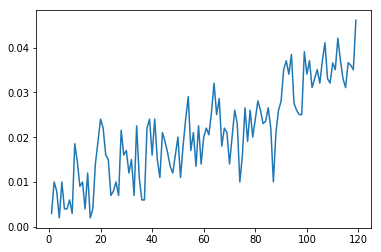

In [61]:
pylab.plot(sample_size, time_l)
pylab.show()

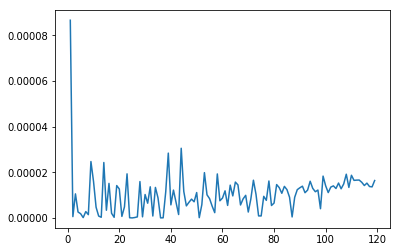

In [62]:
pylab.plot(sample_size, error_l)
pylab.show()

### Regarding Time,

#### we see smaller batch size gives higher speed. This might comes from that a smaller batch require smaller memory space each step and thus inprove efficiency. ; also larger batch gives lower variance in each step's move, thus has less ability to "jump" local minimum and arrive convergent point, such "bumping" around minimum could also increase iteration time.

### Regarding Error, 

#### Again, smaller batch size lead to higher variance in each step's move(since fewer points used in approaching);
#### This offers a changce for the cost function to "jump through" some local minimum and approches longterm convergence. 

#### However, this variance shouldn't be too large( in the case of small batch size, left end of the graph), because such small size could lead to high overfitting since there is a chance that not all data points are used.

#### On ther other hand, when batch size is too large say above 60, the problem is again cost function cannot jump through local minimum , or simply bumping around minimum but couldn't approch, which also lead to higher error.

#### Thus we might want to use small to medium batch size by some cross validation in practice. (tuning hyper parameter by test mse)


In [65]:
### Part3   Ridge Regression
# theta_ridge=inv((X′X+λI)) * X′Y
def get_close_form_ridge(data,lamda):
    ''' theta_ridge=inv((X′X+λI)) * X′Y
    '''
    (a,b)=data.shape
    x=data[:,0:-1]
    y=data[:,-1]
    xt=x.transpose()
    I=np.identity(b-1)
    sol=inv(xt.dot(x)+lamda*I).dot(xt.dot(y))
    return sol
                                   
                                   
                                   
def get_sgd_form_ridge(data,m,max_iter,learning_rate,lamda,tolerance):
    '''
    use stochastic gradiant descent, batch size m, and other parameters;
    in ridge regression, the only difference is the dereivative part: XtY=(XtX+λI)theta --> theta = XtY/(XtX+λI)
    
    '''
    #for data size n*p
    x=data[:,0:-1]
    y=data[:,-1]
    (a,b)=data.shape
    init_sol=np.full(b-1,0)
    sol=[init_sol]
    k=0
    dist=[0]
    error=tolerance
    I=np.identity(b-1)                                                                                            
    while True:
        ro=learning_rate/(0.0001*k+1)
        sample_index=random.sample(range(a),m)
        x_sub=x[sample_index,:]
        y_sub=y[sample_index]
        #dj/dtheta=2xt(xtheta-y) iter step
        sol.append(sol[k]-2/m*ro*((x_sub.transpose().dot(x_sub)+lamda*I).dot(sol[k])-x_sub.transpose().dot(y_sub)))
        k+=1
        dist.append(np.linalg.norm((sol[k]-sol[k-1])))
        #check convergence
        if  np.linalg.norm(2/m*((x_sub.transpose().dot(x_sub)+lamda*I).dot(sol[k])-x_sub.transpose().dot(y_sub))) <error or k> max_iter:
            #print("iterations taken is:",k,"last step move is", dist[k])
            #pylab.plot(range(len(sol)), dist)
            #pylab.show()
            return sol[k]
        #else:
           # print(k,dist[k])

#### Next we import dataset 2 , and normalize the data

In [66]:
# create data input for n=2,3,5 
# using dataset2
mat_2 = sio.loadmat('dataset2.mat', squeeze_me=True)
X_trn_d2=mat_2["X_trn"]
X_tst_d2=mat_2["X_tst"]
Y_trn_d2=mat_2["Y_trn"]
Y_tst_d2=mat_2["Y_tst"]
train_2_d2=form_data(X_trn_d2,Y_trn_d2,2)
train_3_d2=form_data(X_trn_d2,Y_trn_d2,3)
train_5_d2=form_data(X_trn_d2,Y_trn_d2,5)
test_2_d2=form_data(X_tst_d2,Y_tst_d2,2)
test_3_d2=form_data(X_tst_d2,Y_tst_d2,3)
test_5_d2=form_data(X_tst_d2,Y_tst_d2,5)
(train_2_scaled_d2,test_2_scaled_d2)=normalize_data(train_2_d2,test_2_d2)
(train_3_scaled_d2,test_3_scaled_d2)=normalize_data(train_3_d2,test_3_d2)
(train_5_scaled_d2,test_5_scaled_d2)=normalize_data(train_5_d2,test_5_d2)

#### Let's first check if our ridge regression is correct:

#### From the lecture we learn that when lamda=0 result should be same as OLS regression;when lamda --> infinity, result should approach 0

#### We see the result meet these intuitions

In [67]:
print(get_close_form_ridge(train_2_scaled_d2,0))
print(get_close_form(train_2_scaled_d2))

[ 0.75305942  0.57710701 -0.06444699]
[ 0.75305942  0.57710701 -0.06444699]


In [68]:
print(get_close_form_ridge(train_2_scaled_d2,10000000))
print(get_close_form(train_2_scaled_d2))

[  1.53166393e-05   2.35016716e-05   1.98153402e-05]
[ 0.75305942  0.57710701 -0.06444699]


In [69]:
print(get_sgd_form_ridge(train_2_scaled_d2,m=100,max_iter=50000,learning_rate=0.01,lamda=0,tolerance=0.005))
print(get_sgd_form(train_2_scaled_d2,m=100,max_iter=50000,learning_rate=0.01,tolerance=0.005))

[ 0.51119629  0.65711602  0.02695001]
iterations taken is: 4300 last step move is 3.49676476764e-05
[ 0.51119629  0.65711602  0.02695001]


In [70]:
print(get_sgd_form_ridge(train_5_scaled_d2,m=100,max_iter=20000,learning_rate=0.01,lamda=10000,tolerance=0.005))
print(get_sgd_form(train_5_scaled_d2,m=100,max_iter=20000,learning_rate=0.01,tolerance=0.005))

[ 0.01365905  0.02098822  0.01764633  0.02282621  0.01570808  0.02425438]
iterations taken is: 1506 last step move is 4.34601725899e-05
[ 0.06512885  0.26529776  0.08274204  0.29223377 -0.00998131  0.28390031]


#### Next lets def a function to do cross validataion:

#### the idea is for each model_i, we split training data to k folder; 
#### each step we leave 1 folder as validation set, fit model on other k-1 folders and evaluate mse on the left 1 folder; 
#### after runing this k times, we get avg mse as the model_i's final mse; 
#### then we can select lowest final mse (and the model that achieves this best mse should be the output, i.e. lamda in our case)


In [71]:
### write a function to do cross validation: 
#the idea is for each model_i, we split training data to k folder, each step we leave 1 folder as validation set, fit model on other k-1 folders 
# and evaluate mse on the left 1 folder
# after runing this k times, we get avg mse as the model_i's final mse
# select lowest final mse and the model that achieves this mse should be the output, i.e. lamda in our case

def cv_lamda_close(data,k,lamda,m):   
    '''
    data is whole training data; k folder cv; lamda is a list of potential lmada
    '''
    result=[]
    theta_l=[]
    minm=1
    for l in lamda:        
        lamda_k=l
        x=data[:,0:-1]
        y=data[:,-1]
        kf = KFold(n_splits=k)
        #result=[0]*k #init a list for all k result
        train_index=[]
        test_index=[]   
        mse=[]
        for (tra,tst) in kf.split(x):
            train_index.append(tra)
            test_index.append(tst)
        for i in range(k): # each split we evaluate mse; avg mse to get best lmbda
            train=data[train_index[i]]
            test=data[test_index[i]]
            theta=get_close_form_ridge(train,lamda_k)
            theta_l.append(theta)
            mse_test=evaluate_error(theta,test)
            mse.append(mse_test)
        avg_mse=sum(mse)/len(mse)
        result.append(avg_mse)
    #now find index of min avg_mse in the result list
    for i in range(len(result)):
        if result[i] < minm:
            minm = result[i]
            minIndex = i
    opt_lamda=lamda[minIndex]
    # now use optimal lamda to get optimal theta using the whole training set
    opt_theta=get_close_form_ridge(data,opt_lamda,)
    return opt_lamda,opt_theta



def cv_lamda_sgd(data,k,lamda,m,max_iter,learning_rate, tolerance):   
    '''
    data is whole training data; k folder cv; lamda is a list of potential lmada
    '''
    result=[]
    #theta_l=[]
    minm=10
    for l in lamda:        
        lamda_k=l
        x=data[:,0:-1]
        y=data[:,-1]
        kf = KFold(n_splits=k)
        #result=[0]*k #init a list for all k result
        train_index=[]
        test_index=[]   
        mse=[]
        for (tra,tst) in kf.split(x):
            train_index.append(tra)
            test_index.append(tst)
        for i in range(k): # each split we evaluate mse; avg mse to get best lmbda
            train=data[train_index[i]]
            test=data[test_index[i]]
            theta=get_sgd_form_ridge(train,m,max_iter,learning_rate,lamda_k,tolerance)
            #theta_l.append(theta)
            mse_test=evaluate_error(theta,test)
            mse.append(mse_test)     
        avg_mse=sum(mse)/len(mse)
        result.append(avg_mse)
    #now find index of min avg_mse in the result list
    for i in range(len(result)):
        if result[i] < minm:
            minm = result[i]
            minIndex = i
    opt_lamda=lamda[minIndex]
    # now use optimal lamda to get optimal theta using the whole training set
    opt_theta=get_sgd_form_ridge(data,m,max_iter,learning_rate,opt_lamda,tolerance)
    return opt_lamda,opt_theta
        


In [72]:
def get_optimal_lamda_theta_testmse_close(train_data,k,lamda,m,test_data):
    (opt_lamda,opt_theta)=cv_lamda_close(train_data,k,lamda,m)
    #print(opt_lamda,opt_theta)
    #evaluate mse on test
    training_mse=evaluate_error(opt_theta,train_data)
    test_mse=evaluate_error(opt_theta,test_data)
    #print("optimal lamda is", opt_lamda)
    #print("optimal theta is", opt_theta)
    #print("training mse is", training_mse)
    #print("test mse is", test_mse)
    return opt_lamda,opt_theta,training_mse,test_mse

def get_optimal_lamda_theta_testmse_sgd(train_data,k,lamda,m,max_iter,learning_rate,tolerance,test_data):
    (opt_lamda,opt_theta)=cv_lamda_sgd(train_data,k,lamda,m,max_iter,learning_rate,tolerance)
    #print(opt_lamda,opt_theta)
    #evaluate mse on test
    training_mse=evaluate_error(opt_theta,train_data)
    test_mse=evaluate_error(opt_theta,test_data)
    #print("optimal lamda is", opt_lamda)
    #print("optimal theta is", opt_theta)
    #print("training mse is", training_mse)
    #print("test mse is", test_mse)
    return opt_lamda,opt_theta,training_mse,test_mse

#### Lets run the cross validataion to determin optimal lamda and theta;

#### here we choose lamda from a given list


In [85]:
##here i set a higher tolerance for computing speed, this might not generate optimal theta due to precision,
##but could illustrate optimal lamda; 
#we will evaluate optimal theta using close form next since ti will be faster for given data which doesn't contain high dimension

m=25
max_iter=1000
lamda=[0.1,1,10,100]
tolerance=0.005
for k in [2,10,100]:
    print("---------",k,"folder result-------- :")
    print("for n=2, K=",k)
    print(get_optimal_lamda_theta_testmse_sgd(train_2_scaled_d2,k,lamda,m,max_iter,0.1,tolerance,test_2_scaled_d2))
    print("for n=3, K=",k)
    print(get_optimal_lamda_theta_testmse_sgd(train_3_scaled_d2,k,lamda,m,max_iter,0.1,tolerance,test_3_scaled_d2))
    print("for n=5, K=",k)
    print(get_optimal_lamda_theta_testmse_sgd(train_5_scaled_d2,k,lamda,m,max_iter,0.05,tolerance,test_5_scaled_d2))
    

--------- 2 folder result-------- :
for n=2, K= 2
(1, array([ 0.32707176,  0.63629835,  0.18148645]), 0.00017398050576484202, 0.0048482367277862589)
for n=3, K= 2
(1, array([ 0.17259878,  0.33797473,  0.11397537,  0.42998514]), 3.4216547838715818e-05, 0.0045503157725779357)
for n=5, K= 2
(10, array([ 0.11144357,  0.21525928,  0.11380691,  0.22990142,  0.09097874,
        0.23896413]), 5.1487684311893409e-05, 0.011464272241418419)
--------- 10 folder result-------- :
for n=2, K= 10
(1, array([ 0.31790299,  0.60735221,  0.24144444]), 0.00010218817031895628, 0.0036969703285432711)
for n=3, K= 10
(0.1, array([ 0.15113786,  0.29829611,  0.08902603,  0.50060443]), 2.345902671849246e-05, 0.0044421186067207788)
for n=5, K= 10
(0.1, array([ 0.09780139,  0.25727643,  0.06789743,  0.272838  ,  0.02942961,
        0.27503344]), 5.365510104827164e-06, 0.006261311355829878)
--------- 100 folder result-------- :
for n=2, K= 100
(0.1, array([ 0.35346573,  0.68613827,  0.11052426]), 0.00017692108248667

#### we find increasing folder k does not dramatically decrease test error; 
#### for moderate size data, a K size of 3,5,10 would be sufficient,
#### a leave-one-out cross validation could get better mse but not much, and takes a lot more time

In [86]:

lamda=list(range(0,100))
for k in [2,10,100]:
    print("--------",k,"folder result-------- :")
    print("for n=2, K=",k)
    print(get_optimal_lamda_theta_testmse_close(train_2_scaled_d2,k,lamda,m,test_2_scaled_d2))
    print("for n=3, K=",k)
    print(get_optimal_lamda_theta_testmse_close(train_3_scaled_d2,k,lamda,m,test_3_scaled_d2))
    print("for n=5, K=",k)
    print(get_optimal_lamda_theta_testmse_close(train_5_scaled_d2,k,lamda,m,test_5_scaled_d2))
####

-------- 2 folder result-------- :
for n=2, K= 2
(3, array([ 0.39723693,  0.64157951,  0.12411292]), 0.00016513727729370963, 0.0052179451375282742)
for n=3, K= 2
(0, array([-0.61222534, -0.03669192,  0.27725081,  1.12052162]), 1.1920807900632257e-07, 0.0010441417214567424)
for n=5, K= 2
(0, array([-0.82494675,  0.00450989,  0.22351561,  0.91044757,  0.11647608,
        0.24551411]), 2.666938794424126e-08, 0.00086587638132447126)
-------- 10 folder result-------- :
for n=2, K= 10
(0, array([ 0.75305942,  0.57710701, -0.06444699]), 9.2531570786793317e-05, 0.0089188623021145639)
for n=3, K= 10
(0, array([-0.61222534, -0.03669192,  0.27725081,  1.12052162]), 1.1920807900632257e-07, 0.0010441417214567424)
for n=5, K= 10
(0, array([-0.82494675,  0.00450989,  0.22351561,  0.91044757,  0.11647608,
        0.24551411]), 2.666938794424126e-08, 0.00086587638132447126)
-------- 100 folder result-------- :
for n=2, K= 100
(0, array([ 0.75305942,  0.57710701, -0.06444699]), 9.2531570786793317e-05, 0

### The result above is optimal theta, training mse and test mse (optimal lamda is 0)

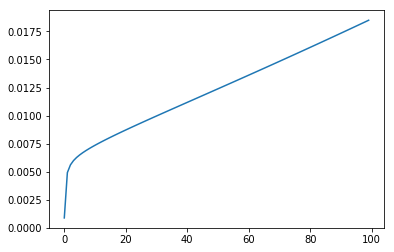

In [98]:
# plot lamda vs test error
time_l=[]
error_l=[]
for lamda in list(range(100)):
    start=datetime.datetime.now()
    (a,b,c,d)=get_optimal_lamda_theta_testmse_close(train_5_scaled_d2,k,[lamda],25,test_5_scaled_d2)
    test_error=evaluate_error(sgd,test_3_scaled)
    end=datetime.datetime.now()
    time=(end-start).total_seconds()
    time_l.append(time)
    error_l.append(d)
pylab.plot(list(range(100)), error_l)
pylab.show()

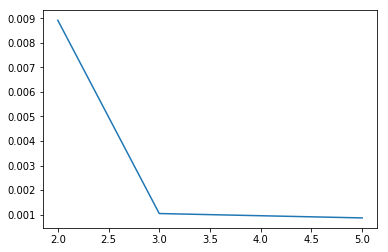

[0.0089188623021145639, 0.0010441417214567424, 0.00086587638132447126]

In [109]:
# plot n vs test error
n=[2,3,5]
error_l=[]
(a,b,c,d_2)=get_optimal_lamda_theta_testmse_close(train_2_scaled_d2,10,[0],25,test_2_scaled_d2)
(a,b,c,d_3)=get_optimal_lamda_theta_testmse_close(train_3_scaled_d2,10,[0],25,test_3_scaled_d2)
(a,b,c,d_5)=get_optimal_lamda_theta_testmse_close(train_5_scaled_d2,10,[0],25,test_5_scaled_d2)
error_l=[d_2,d_3,d_5]
pylab.plot(n, error_l)
pylab.show()
error_l


#### After tried several lamda, we see the cross validation tend to select small lamda (approches 0 as optimal), i.e. OLS solution.


#### For test error, it decrese as lamda decrease and it decrease as n increase.  
##### This is because, intuitively, more expanatory variables (as n=2,3,5) will expain more variance for error, and for our data, it's not really high dimensional, and ridge regression's regulating term is not really helpful here.


#### again we noticed that traning error is always smaller than test error, a example of overfiting


### Next lets check if we got correct optimal lamda by SKlearn's Cross-validation package

In [110]:
from sklearn import linear_model

In [111]:
#Check result from sklearn's cross-validation package:
reg = linear_model.RidgeCV([0.001,0.1,1.0,2.0,3.0,10.0,100.0,1000000.0])
reg.fit(train_2_scaled_d2[:,0:-1], train_2_scaled_d2[:,-1])       
print(reg.alpha_) 
reg = linear_model.RidgeCV([0.001,0.1,1.0,2.0,3.0,10.0,100.0,1000000.0])
reg.fit(train_3_scaled_d2[:,0:-1], train_3_scaled_d2[:,-1])       
print(reg.alpha_) 
reg = linear_model.RidgeCV([0.001,0.1,1.0,2.0,3.0,10.0,100.0,1000000.0])
reg.fit(train_5_scaled_d2[:,0:-1], train_5_scaled_d2[:,-1])       
print(reg.alpha_)

0.001
0.001
0.001


#### we see optimal lamda indeed approaches 0, same result as from our function